In [2]:
from scipy.sparse import csr_matrix
from scipy.sparse import kron
from scipy.sparse import linalg
import numpy as np
import matplotlib.pyplot as plt


Id = csr_matrix(([1,1], ([0,1], [0,1])), shape=(2,2))
Sx = csr_matrix(([1,1], ([0, 1], [1, 0])), shape=(2,2))                
Sz = csr_matrix(([1,-1], ([0,1], [0,1])), shape=(2,2))     

print('Identity matrix = ', Id, '\n Pauli matrix X = ', Sx, '\n Pauli matrix Z = ', Sz)

Identity matrix =    (0, 0)	1
  (1, 1)	1 
 Pauli matrix X =    (0, 1)	1
  (1, 0)	1 
 Pauli matrix Z =    (0, 0)	1
  (1, 1)	-1


In [3]:
def create_sigma_z_j(j,L):
    assert j<L
    if j == 0:
        full = kron(Sz, Id, format ='csr')
    elif j==1:
        full = kron(Id, Sz, format ='csr')
    else:
        full = kron(Id, Id, format ='csr')
    for i in range(2, L):
        if i == j:
            full = kron(full, Sz, format ='csr')
        else:
            full = kron(full, Id, format ='csr')
    return full


print(create_sigma_z_j(1, 2).toarray())


[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  1  0]
 [ 0  0  0 -1]]


In [4]:
def create_sigma_x_j(j,L):
    assert j<L
    if j == 0:
        full = kron(Sx, Id, format ='csr')
    elif j==1:
        full = kron(Id, Sx, format ='csr')
    else:
        full = kron(Id, Id, format ='csr')
    for i in range(2, L):
        if i == j:
            full = kron(full, Sx, format ='csr')
        else:
            full = kron(full, Id, format ='csr')
    return full


print(create_sigma_x_j(0, 2).toarray())

[[0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]]


In [30]:
L = 2
g = .1
J = 1

def gen_hamiltonian(sx_list, sz_list, g, J):
    
    L = len(sx_list)
    Sum_1 = csr_matrix((2**L, 2**L))
    Sum_2 = csr_matrix((2**L, 2**L))
    
   
    for i in range(len(sx_list)):
        Sum_1 += sx_list[i] * sx_list[(i+1)%len(sx_list)]
        Sum_2 += sz_list[i]

    return -J * Sum_1 - g * Sum_2

sx_list = [create_sigma_x_j(j,L) for j in range(L)]
sz_list = [create_sigma_z_j(j,L) for j in range(L)]


print(gen_hamiltonian(sx_list, sz_list, g, J).toarray())

[[-0.2  0.   0.  -2. ]
 [ 0.   0.  -2.   0. ]
 [ 0.  -2.   0.   0. ]
 [-2.   0.   0.   0.2]]


In [6]:
print(linalg.eigsh(gen_hamiltonian(sx_list, sz_list, g, J), k=3, M=None, sigma=None, which='SA'))


(array([-2.03960781, -2.        ,  2.        ]), array([[ 7.73342141e-01, -7.54951657e-15,  3.01147995e-15],
       [-6.79165925e-15, -7.07106781e-01,  7.07106781e-01],
       [-7.10542736e-15, -7.07106781e-01, -7.07106781e-01],
       [ 6.33988906e-01, -5.93969318e-15, -3.34454686e-15]]))


(1, 1)


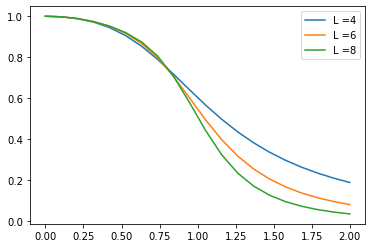

In [25]:
for L in range(4,9,2):
    
    Correlation_list = []
    sx_list = [create_sigma_x_j(j,L) for j in range(L)]
    sz_list = [create_sigma_z_j(j,L) for j in range(L)]
    
    for g in np.linspace(0,2, 20):
        
        Eigen_value, Eigen_vector = linalg.eigsh(gen_hamiltonian(sx_list, sz_list, g, J), k=1, M=None, sigma=None, which='SA')
        Correlation = Eigen_vector.T @ ((create_sigma_x_j(0,L) * create_sigma_x_j(L/2,L)) * Eigen_vector)
    
        Correlation_list.append(Correlation[0])
    plt.plot(np.linspace(0,2,20), Correlation_list, label = 'L ={}' .format(L))   

    
plt.legend()
    

print((Correlation).shape)


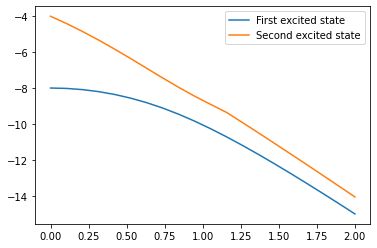

In [27]:
sx_list = [create_sigma_x_j(j,L) for j in range(L)]
sz_list = [create_sigma_z_j(j,L) for j in range(L)]
E_0 = []
E_1 = []


for g in np.linspace(0,2, 20):
    
    Eigen_value, Eigen_vector = linalg.eigsh(gen_hamiltonian(sx_list, sz_list, g, J), k=3, M=None, sigma=None, which='SA')
    E_0.append(Eigen_value[1])
    E_1.append(Eigen_value[2])

        
plt.plot(np.linspace(0,2,20), E_0, label = 'First excited state' )  
plt.plot(np.linspace(0,2,20), E_1, label = 'Second excited state' )  

plt.legend()